# map, filter, reduce, partial Lab
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

In this optional lab you learn about `map()`, `filter()`,  `reduce()` `partial`  functions (most of which are built-in to Python's core).

# MAP, FILTER AND REDUCE

## Anonymous Functions or lambda functions  
An anonymous function is a function without a name. Python provides a great way way of writing nameless, stateless, one-line functions via the `lambda operator`. Like in other programming languages, in Python we can create anonymous functions. Anonymous functions are created using the `lambda` keyword.

Generally these functions just look like an expression, that’s why there are also known as **lambda expressions**

The lambda operator can have any number of arguments, but it can have only **one** expression. It cannot contain any statements and it returns a function object which can be assigned to any variable.
 
syntax: 
 
```python
lambda [argument list] : code statement
``` 
`lambda` is a Python keyword, `argument` is a list that is  optional, and a `:` (read as a colon), fallowed by
 
`code` statement.

Creating a simple onliner function in python can tedious and long. E.g.,

In [19]:
def add(x, y): 
    return x + y
  
# Call the function
add(2, 3)  # Output: 5

5

The above function name is `add`, and it expects two arguments x and y and returns their sum.

Let’s see how we can convert the above function into a lambda function (aka lamdda expression):



In [20]:
add = lambda x, y : x + y 
  
print(add(2, 3)) # Output: 5

5


In `lambda x, y: x + y`,  `x` and `y` are arguments to the function and `x + y` is the expression which gets executed and its values is returned as output.

## map()

```python
map(function_object, iterable1, iterable2,...)
```
map() is built-in python function.

map functions are `higher order` functions  (have a look at functional programming for more background on this type of function) in that it expects a function object and any number of iterables like list, dictionary, etc. It executes the function_object for each element in the sequence and returns a list of the elements modified by the function object, or over each iterable.

 
map() applies the function to all elements of a sequence.

It returns a new list of values after applying the function.

Let’s say we want list of squares of a given list.

In [21]:
def multiply2(x):
  return x * 2
    
m2 = map(multiply2, [1, 2, 3, 4])  # Output [2, 4, 6, 8]
list(m2) #use list to make m2 pretty and printable!

[2, 4, 6, 8]

### map function returns an `iterator` that gets `lazily evaluated`
In Python3, a map function returns an `iterator` or `map object` which gets `lazily evaluated`. Just like zip function is lazily evaluated. 

We can NOT access the elements of the map object with index, nor can we  use len() to find the length of the map object.

We can force convert the map output i.e. the map object to list as shown above : 
```python 
list(m2)```

In the above example, map executes multiply2 function for each element in the list i.e. `1, 2, 3, 4` and returns `[2, 4, 6, 8]`

Let’s see how we can write the above code using map and lambda:

In [22]:
m2 = map(lambda x : x*2, [1, 2, 3, 4]) #Output [2, 4, 6, 8]
list(m2)

[2, 4, 6, 8]

### Iterating over a dictionary using map and lambda

In [23]:
dict_a = [{'name': 'python', 'points': 10}, {'name': 'java', 'points': 8}]
  
print(f"dict_a: {dict_a}")
print(f"{list(map(lambda x : x['name'], dict_a))}")  # pull out the 'name' items: Output: ['python', 'java']
  
print(f"{list(map(lambda x : x['points']*10,  dict_a))}")  # Output: [100, 80]

print(f"{list(map(lambda x : x['name'] == 'python', dict_a))}")  # Output: [True, False]

dict_a: [{'name': 'python', 'points': 10}, {'name': 'java', 'points': 8}]
['python', 'java']
[100, 80]
[True, False]


In the above example, each dict of dict_a will be passed as parameter to the lambda function. Result of lambda function expression for each dict will be given as output.

### Multiple iterables to the map function
We can pass multiple sequences to the map functions as shown below:

In [24]:
list_a = [1, 2, 3]
list_b = [10, 20, 30]
  
map(lambda x, y: x + y, list_a, list_b) # Output: [11, 22, 33]

Here, each $i^{th}$ element of list_a and list_b will be passed as argument to the lambda function.



## filter()

Now we look at another useful built-in higher-order function, `filter()`
 

filter()
 

syntax:
  
```python
filter(function or None, iterable)
```
  
filter() function filters out all elements of an iterable,
 
for which function returns True. If function is None,

returns all items that are true.

filter requires both arguments.

filter function expects two arguments, function_object and an iterable. function_object returns a boolean value. function_object is called for each element of the iterable and filter returns only those element for which the function_object returns true.

Like map function, the filter function  returns a list of element. Unlike map function filter function can only have one iterable as input.

In [25]:
a = [1, 2, 3, 4, 5, 6]
list(filter(lambda x : x % 2 == 0, a)) # Output: [2, 4, 6]

[2, 4, 6]

### Filter list of dicts

In [18]:
dict_a = [{'name': 'python', 'points': 10}, {'name': 'java', 'points': 8}]

list(filter(lambda x : x['name'] == 'python', dict_a)) # Output: [{'name': 'python', 'points': 10}]

[{'name': 'python', 'points': 10}]

In [26]:
a = [1,2,3,0,5,{},7,8,9,10,""]
 
filtered = filter(None,a)
 
list(filtered)

[1, 2, 3, 5, 7, 8, 9, 10]

  
Returns a filter object, with applied filter condition.

  
Notice here we have not provided any filter function, and the list contains, some None equivalents, 0, {} and “”
filter applies truthiness check on all elements, and omits which are False.
 

### Using map() and filter() in combination
 
From a given list, get squares of evens.

using `map`, `filter` and `lambda`functions together
  

In [28]:
a = [1,2,3,4,5,6,7,8,9,10]
 
even_squares = list(map(lambda i : i**2, filter(lambda i :i %2 ==0,a)))
print(even_squares)

[4, 16, 36, 64, 100]


At first it may look complicated, but its not; let’s break it down:
 
```python
lambda i : i**2 
```

returns squares of i

```python
lambda i :i %2 == 0 
```
returns `True` of only even numbers.

`filter` takes two arguments

```python
filter(lambda i :i %2 == 0, a)  # function and a sequence
```

This results in a filter object which generated even numbers:
```python
2,4,6,8,10
```

```python
map(lambda i : i**2, seq)
```
and the result is map object with sequence of squares of evens which is converted to list() for display purpose.


`map()` and `filter()` are generally used with lambda functions,

As its not necessary to have a entire function for a quick job.



## reduce()
Now we look at another useful higher-order function, reduce(), that uses a divide-and-conquer (head, tail list-type processing) strategy to process input collection so that it can be reduced down to a single entity.

```python 
from functools import reduce
filter()
```
Note reduce() function is moved to functools module. To use reduce() you have to import functools module.

```python
from functools import reduce
```
The Python documentation for `reduce()` is very clear, we can get it by using help() on reduce.
  

```python
help(reduce)
```

output:
 
```
reduce(...)
    reduce(function, sequence[, initial]) -> value
     
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.

    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
 
    ((((1+2)+3)+4)+5).  
    
    If initial is present, it is placed before the items
 
    of the sequence in the calculation, and serves as a default when the
 
    sequence is empty.
``` 
 
### reduce: simple example
Sum of all elements of a list.

  

In [35]:
from functools import reduce
a =[1,2,3,4]
 
print(f"reduce(lambda x,y: x+y,a): {reduce(lambda x,y: x+y,a)}") # returns: 10

print(f"sum(a): {sum(a)}") # returns: 10

reduce(lambda x,y: x+y,a): 10
sum(a): 10


Here `reduce()` applies a lambda function, cumulatively to each item of list. The result is calculated as follows"

```python
((((1+2))+3)+5) 
```

which results in a scalar value of  $10$.

`sum(a)` returns the same response and is much simpler. BUT, example shown here is very rudimentary, perhaps of no practical use. But it helps in understanding how reduce() works. Let’s consider another simple example:
 
### Maximum value in a list.
 Find the maximum value in a list.

In [36]:
a =[11,2,13,41,34,30]
max_value = lambda x,y: x if (x > y) else y
 
reduce(max_value, a)  # returns 41

41

### Get product of all list elements
  

In [37]:
a =[1,2,3,4,5,6]
 
list_product = lambda x, y: x * y
 
reduce(list_product, a) #returns 720


720

The result 720 is obtained like this, 

```python
(((((1*2)*3)*4)*5)*6)
```

Reduce applied the `lambda` function cumulatively on each item of a list.


# Partial functions: 
## Derive a function with x parameters to a function with fewer parameters

We will use `parital functions` in this task. Before delving into the task, let's introduce `partial functions`. 
You can create partial functions in python by using the partial function from the functools library. Partial functions allow one to derive a function with x parameters to a function with fewer parameters and fixed values set for the more limited function.


In [39]:
from functools import partial

def multiply(x,y):
        return x * y

# create a new function that multiplies by 2
dbl = partial(multiply,2)
print(dbl(4))

8


## Lab Exercise
Create a new partial function `simple_eqn()` by calling partial() on `eqn(), and replacing the first three variables in `eqn()`. Then print with the new partial function `simple_eqn()` (hint: which has using only one input variable) so that the output equals 60. Let's assume the input to the partial function is $3$.

In [83]:
#Following is the exercise, function provided:
from functools import partial
def eqn(u,v,w,x):
    return u*4 + v*3 + w*2 + x
#Enter your code here to create and print with your partial function

simple_eqn = partial(func,....)
print(simple_eqn(...))

SyntaxError: invalid syntax (<ipython-input-83-2c18c5f9c109>, line 7)

## Lab Solution


In [41]:
#### Lab Solution
#Following is the exercise, function provided:
from functools import partial
def eqn(u,v,w,x):
    return u*4 + v*3 + w*2 + x

#simple_eqn is derived function with with fewer parameters to the main func eqn()
simple_eqn = partial(eqn,10, 3, 4) 
print(simple_eqn(3))

60


# Example: map, reduce, partial, lambda

Compute the centroid or average of array of vectors (numeric) vectors. This is a useful calculation for KMeans clustering!


In [66]:
import numpy as np
X_train = np.array([[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4], [5,5,5,5] ])
print(f"X_train: \n{X_train}")

X_train: 
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


In [46]:
cluster = X_train
print(f"{list (map(lambda x: x / len(cluster), reduce(partial(map, add), cluster))) }")

[3.25, 6.5, 9.75]


### Let's breakdown `reduce(partial(map, add), cluster)`

In [57]:
print(f"cluster:\n{cluster}")
print(f"\nlist (reduce(partial(map, add), cluster) ):\n{list (reduce(partial(map, add), cluster) )}")

cluster:
[[ 1  2  3]
 [ 1  2  3]
 [ 1  2  3]
 [10 20 30]]

list (reduce(partial(map, add), cluster) ):
[13, 26, 39]


[13, 26, 39]

In [63]:
print(f"cluster:\n{cluster}")
print(f"list (reduce(add, cluster) ):\n{list (reduce(add, cluster) )}")

cluster:
[[ 1  2  3]
 [ 1  2  3]
 [ 1  2  3]
 [10 20 30]]
list (reduce(sum, cluster) ):
[13, 26, 39]


## Vectorizing: Using numpy instead (makes it simpler and faster!)

Let's vectorize the above code as it will be much faster and cleaner to follows:

```python
map(lambda x: x / len(cluster), reduce(partial(map, add), cluster))
```

In [82]:
cluster.sum(axis =0)

array([13, 26, 39])

In [80]:
X = np.array([[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4], [5,5,5,5] ])
means =np.array([[1,1,1,1],
        [3,3,3,3],
        [6,6,6,6] ])

def predict(X, means):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((X - means[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

closest_centroid(X, means)

array([0, 0, 1, 1, 2])

# KMeans : E-Step vectorized

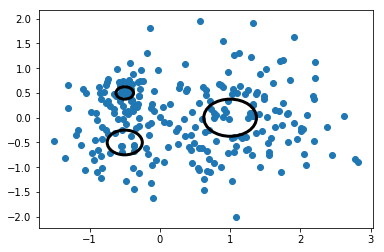

In [74]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import random
from functools import reduce, partial
from operator import add
%matplotlib inline

points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

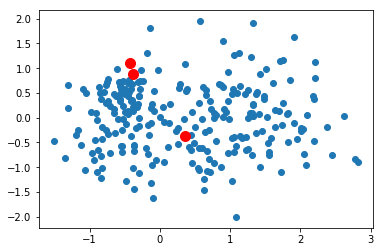

In [75]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

initialize_centroids(points, 3)

plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [78]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

c = initialize_centroids(points, 3)
closest_centroid(points, c)
#closest_centroid(X, means)

array([2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
centroids.shape[0]

3